## **CMSC320 Homework 4**
### Kritak Patel
### Section 0101

#### **#1 Data Exploration**

In [129]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [130]:
df = pd.read_csv("Dataset Generation (Max) (Responses) - Form Responses 1.csv")
df2 = pd.read_csv("Dataset Generation (Fardina) (Responses) - Form Responses 1.csv")

In [131]:
df.head(10)

,Timestamp,What year are you?,How old are you?,You could describe the adults you grew up with as...,You could describe yourself as...,How would you rate your religiousness / spirituality?,What bests represents your gender?,"My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?","My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?","I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my girlfriend, who comes from a poor family, and we split things 50-50. Recently, she found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making her split things 50/50. I told her it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",...,"I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?","My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?","My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says ""nephew loves you so much"" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?","I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?","I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate

In [132]:
df2.head(10)

,Timestamp,What year are you?,How old are you?,You could describe the adults you grew up with as...,You could describe yourself as...,How would you rate your religiousness / spirituality?,What bests represents your gender?,Would you describe yourself as compassionate?,"My girlfriend is a doctor. Lately she's been complaining about pain in her right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told her she needs to see someone about it but she told me it was fine. So I told her that if this is how she treats herself, I'd be concerned about being her patient. She was shocked and told me that was uncalled for. Am I a jerk?","My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jerk?",...,"I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?","My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat them and we would have to go out and get food. I told her that was what there was to eat, and if she ruined it she'd have to wait for her mom to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?","My parents want us to come out for their anniversary, and bought my sister and I tickets on the same flight. My sister has two kids - a 6 month old and a 5 year old. She is currently separated from her husband so she would have to handle 2 children by herself on a 10 hour flight.\n\nShe calls me up a week or so beforehand and asks me if I will be willing to help her take care of her kids on the flight, and something about taking shifts so we can both sleep. I tell her that I wasn't comfortable with that, but she says ""nephew loves you so much"" so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my sister. Am I a jerk?","I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?","I have a child with a mother who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's mother to make sure she's paying adequate child support. Periodically I either hire an investigator or her mom just tells me she got a raise and I go to court to adjust the child support accordingly. The last time I did this, she didn't show up for court and I apparently overestimated how much her raise was and I got a default judgment. She called me up and practically pleaded with me to lower her payments after I said no she insulted me and my son. Am I a jer

In [133]:
# Problem 1.1 Data Issue 1 (Rename Columns of Max's Class)
df = df.rename(columns = {
    "What year are you?":"Class Year",
    "How old are you?":"Age",
    "You could describe the adults you grew up with as...":"Parent's Political Inclination",
    "You could describe yourself as...":"Your Political Inclination",
    "How would you rate your religiousness / spirituality?":"Religious Belief Strength",
    "What bests represents your gender?":"Gender"
})

df_columns = df.columns[7:]
question_number = 1
for col_name in df_columns:
    df = df.rename(columns = {
        col_name:"Question about Hypotheticals " + str(question_number)
    })
    question_number+=1

df.head(10)

,Timestamp,Class Year,Age,Parent's Political Inclination,Your Political Inclination,Religious Belief Strength,Gender,Question about Hypotheticals 1,Question about Hypotheticals 2,Question about Hypotheticals 3,...,Question about Hypotheticals 5,Question about Hypotheticals 6,Question about Hypotheticals 7,Question about Hypotheticals 8,Question about Hypotheticals 9,Question about Hypotheticals 10,Question about Hypotheticals 11,Question about Hypotheticals 12,Question about Hypotheticals 13,Question about Hypotheticals 14
0,8/15/2023 16:21:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/23/2023 17:58:09,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk
2,9/23/2023 18:02:48,Senior,NaN,Mildly conservative,Mildly liberal,Not spiritual at all,Non-binary / other,Mildly a jerk,Mildly a jerk,Not a jerk,...,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
3,9/23/2023 18:02:48,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Strongly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
4,9/23/2023 18:03:20,Sophmore,19,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk
5,9/23/2023 18:06:57,Senior,21,Strongly liberal,Strongly liberal,Not spiritual at all,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk
6,9/23/2023 18:10:13,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
7,9/23/2023 18:15:06,Junior,19,Neutral,Neutral,Strongly spiritual,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
8,9/23/2023 18:20:01,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk
9,9/23/2023 18:23:18,Junior,20,Don't know / It's complicated,Don't know / It's complicated,Strongly spiritual,Prefer not to say,Not a jerk,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk


In [134]:
# Problem 1.1 Data Issue 1 (Rename Columns of Fardina's Class)
df2 = df2.rename(columns = {
    "What year are you?":"Class Year",
    "How old are you?":"Age",
    "You could describe the adults you grew up with as...":"Parent's Political Inclination",
    "You could describe yourself as...":"Your Political Inclination",
    "How would you rate your religiousness / spirituality?":"Religious Belief Strength",
    "What bests represents your gender?":"Gender",
    "Would you describe yourself as compassionate?":"Are you Compassionate?"
})

df2_columns = df2.columns[8:]
question_number = 1
for col_name in df2_columns:
    df2 = df2.rename(columns = {
        col_name:"Questions about Hypotheticals " + str(question_number)
    })
    question_number+=1

df2.head(10)

,Timestamp,Class Year,Age,Parent's Political Inclination,Your Political Inclination,Religious Belief Strength,Gender,Are you Compassionate?,Questions about Hypotheticals 1,Questions about Hypotheticals 2,...,Questions about Hypotheticals 5,Questions about Hypotheticals 6,Questions about Hypotheticals 7,Questions about Hypotheticals 8,Questions about Hypotheticals 9,Questions about Hypotheticals 10,Questions about Hypotheticals 11,Questions about Hypotheticals 12,Questions about Hypotheticals 13,Questions about Hypotheticals 14
0,9/23/2023 18:01:01,Junior,20.0,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk
1,9/23/2023 18:01:08,Junior,20.0,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk
2,9/23/2023 18:08:57,Junior,20.0,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
3,9/23/2023 18:09:57,Senior,22.0,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
4,9/23/2023 18:10:01,Senior,23.0,Mildly liberal,Strongly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,NaN,NaN,Mildly a jerk,Not a jerk,NaN,NaN,Strongly a jerk
5,9/23/2023 18:10:13,Other,25.0,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk
6,9/23/2023 18:24:21,Sophmore,19.0,Mildly conservative,Mildly liberal,Not spiritual at all,Famale,No,Mildly a jerk,Not a jerk,...,Strongly a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,NaN,Strongly a jerk
7,9/23/2023 18:36:00,Junior,20.0,Mildly conservative,Neutral,Strongly spiritual,Male,No,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk
8,9/23/2023 18:53:52,Junior,20.0,Strongly liberal,Strongly liberal,Somewhat spiritual,Male,Yes,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
9,9/23/2023 19:08:42,Sophmore,19.0,Neutral,Mildly liberal,Not spiritual at all,Male,No,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk


In [135]:
# 1.2 Handle Missing Data

# Remove missing first row and last row in Max data
df.drop(index = 0, inplace = True)
df.drop(index = 96, inplace = True)
df.head(10)

,Timestamp,Class Year,Age,Parent's Political Inclination,Your Political Inclination,Religious Belief Strength,Gender,Question about Hypotheticals 1,Question about Hypotheticals 2,Question about Hypotheticals 3,...,Question about Hypotheticals 5,Question about Hypotheticals 6,Question about Hypotheticals 7,Question about Hypotheticals 8,Question about Hypotheticals 9,Question about Hypotheticals 10,Question about Hypotheticals 11,Question about Hypotheticals 12,Question about Hypotheticals 13,Question about Hypotheticals 14
1,9/23/2023 17:58:09,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk
2,9/23/2023 18:02:48,Senior,NaN,Mildly conservative,Mildly liberal,Not spiritual at all,Non-binary / other,Mildly a jerk,Mildly a jerk,Not a jerk,...,Mildly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk
3,9/23/2023 18:02:48,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Strongly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk
4,9/23/2023 18:03:20,Sophmore,19,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk
5,9/23/2023 18:06:57,Senior,21,Strongly liberal,Strongly liberal,Not spiritual at all,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk
6,9/23/2023 18:10:13,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk
7,9/23/2023 18:15:06,Junior,19,Neutral,Neutral,Strongly spiritual,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk
8,9/23/2023 18:20:01,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Strongly a jerk,Mildly a jerk,...,Mildly a jerk,Not a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk
9,9/23/2023 18:23:18,Junior,20,Don't know / It's complicated,Don't know / It's complicated,Strongly spiritual,Prefer not to say,Not a jerk,Mildly a jerk,Mildly a jerk,...,Mildly a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk
10,9/23/2023 18:26:54,Junior,20,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk


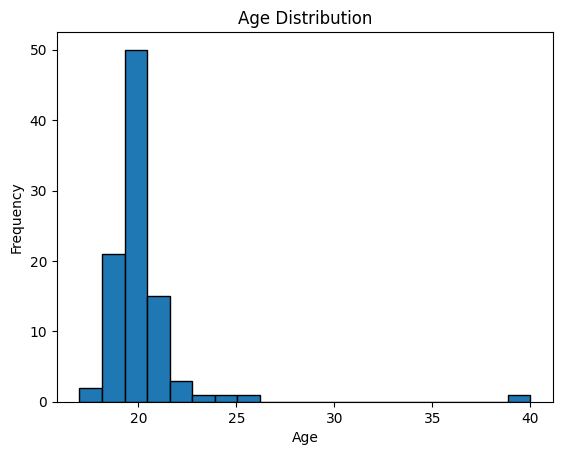

In [136]:
# 1.3 Generalize Age for Max's Class

# Calculate average age without including the incomplete entry with age 50+
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric, coerce non-numeric values to NaN
average_age = df[df['Age'] < 50]['Age'].mean()  # Calculate the average age excluding '50+'

# Replace '50+' and empty entries with the average age
df['Age'] = df['Age'].fillna(average_age).astype(int)  # Fill NaN with average age and convert to int

# Create a histogram
df['Age'].plot(kind='hist', bins=20, edgecolor='black')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

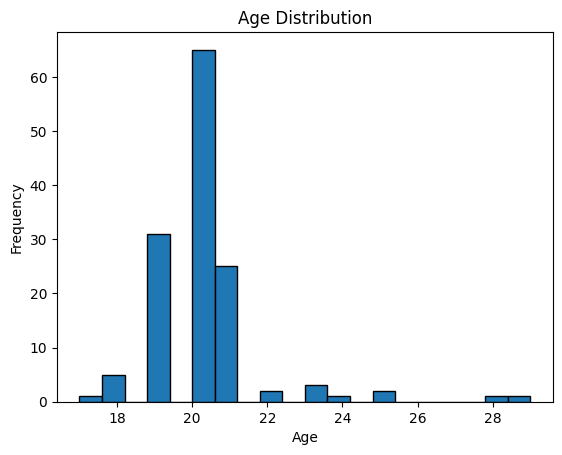

In [137]:
# 1.3 Generalize Age for Fardina's Class

# Calculate the average age
average_age_df2 = df2['Age'].mean()

# Replace '50+' and empty entries with the average age
df2['Age'] = df2['Age'].fillna(average_age_df2).astype(int)  # Fill NaN with average age and convert to int

# Create a histogram
df2['Age'].plot(kind='hist', bins=20, edgecolor='black')

# Add labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

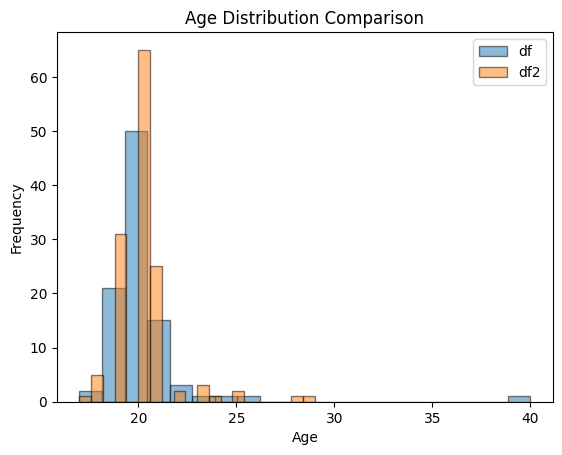

In [138]:
# Create a combined histogram
plt.hist(df['Age'], alpha=0.5, label='df', bins=20, edgecolor='black')
plt.hist(df2['Age'], alpha=0.5, label='df2', bins=20, edgecolor='black')

# Add labels and title
plt.title('Age Distribution Comparison')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Display the histogram
plt.show()

In [139]:
# 1.4 Create New Columns for the Questions about Hypotheticals
options = ['Strongly a jerk', 'Mildly a jerk', 'Not a jerk']

for option in options:
    df[f'Sum_{option}'] = df.apply(lambda row: sum(row == option), axis=1)
    df2[f'Sum_{option}'] = df2.apply(lambda row: sum(row == option), axis=1)


In [140]:
# Max's Class's updated data set
df.head(10)

,Timestamp,Class Year,Age,Parent's Political Inclination,Your Political Inclination,Religious Belief Strength,Gender,Question about Hypotheticals 1,Question about Hypotheticals 2,Question about Hypotheticals 3,...,Question about Hypotheticals 8,Question about Hypotheticals 9,Question about Hypotheticals 10,Question about Hypotheticals 11,Question about Hypotheticals 12,Question about Hypotheticals 13,Question about Hypotheticals 14,Sum_Strongly a jerk,Sum_Mildly a jerk,Sum_Not a jerk
1,9/23/2023 17:58:09,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,1,6,7
2,9/23/2023 18:02:48,Senior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Non-binary / other,Mildly a jerk,Mildly a jerk,Not a jerk,...,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,2,6,6
3,9/23/2023 18:02:48,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Not a jerk,Strongly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,6,3,5
4,9/23/2023 18:03:20,Sophmore,19,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Mildly a jerk,Mildly a jerk,Strongly a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,4,5,5
5,9/23/2023 18:06:57,Senior,21,Strongly liberal,Strongly liberal,Not spiritual at all,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,3,4,7
6,9/23/2023 18:10:13,Junior,20,Neutral,Neutral,Somewhat spiritual,Male,Not a jerk,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,2,4,8
7,9/23/2023 18:15:06,Junior,19,Neutral,Neutral,Strongly spiritual,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,2,2,9
8,9/23/2023 18:20:01,Junior,20,Mildly conservative,Mildly liberal,Not spiritual at all,Male,Mildly a jerk,Strongly a jerk,Mildly a jerk,...,Not a jerk,Mildly a jerk,Strongly a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Not a jerk,4,6,4
9,9/23/2023 18:23:18,Junior,20,Don't know / It's complicated,Don't know / It's complicated,Strongly spiritual,Prefer not to say,Not a jerk,Mildly a jerk,Mildly a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Strongly a jerk,Strongly a jerk,Mildly a jerk,5,5,4
10,9/23/2023 18:26:54,Junior,20,Mildly conservative,Mildly conservative,Strongly spiritual,Male,Not a jerk,Mildly a jerk,Not a jerk,...,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,2,6,6


In [141]:
# Fardina's Class's updated data set
df2.head(10)

,Timestamp,Class Year,Age,Parent's Political Inclination,Your Political Inclination,Religious Belief Strength,Gender,Are you Compassionate?,Questions about Hypotheticals 1,Questions about Hypotheticals 2,...,Questions about Hypotheticals 8,Questions about Hypotheticals 9,Questions about Hypotheticals 10,Questions about Hypotheticals 11,Questions about Hypotheticals 12,Questions about Hypotheticals 13,Questions about Hypotheticals 14,Sum_Strongly a jerk,Sum_Mildly a jerk,Sum_Not a jerk
0,9/23/2023 18:01:01,Junior,20,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Strongly a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Mildly a jerk,4,5,5
1,9/23/2023 18:01:08,Junior,20,Mildly liberal,Mildly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,3,4,7
2,9/23/2023 18:08:57,Junior,20,Mildly conservative,Mildly conservative,Somewhat spiritual,Male,Yes,Not a jerk,Not a jerk,...,Mildly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,2,5,7
3,9/23/2023 18:09:57,Senior,22,Mildly liberal,Mildly liberal,Not spiritual at all,Famale,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Not a jerk,Strongly a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,1,3,10
4,9/23/2023 18:10:01,Senior,23,Mildly liberal,Strongly liberal,Not spiritual at all,Male,Yes,Mildly a jerk,Mildly a jerk,...,NaN,NaN,Mildly a jerk,Not a jerk,NaN,NaN,Strongly a jerk,1,5,2
5,9/23/2023 18:10:13,Other,25,Mildly conservative,Mildly conservative,Not spiritual at all,Male,Yes,Mildly a jerk,Not a jerk,...,Not a jerk,Strongly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,2,4,8
6,9/23/2023 18:24:21,Sophmore,19,Mildly conservative,Mildly liberal,Not spiritual at all,Famale,No,Mildly a jerk,Not a jerk,...,Mildly a jerk,Strongly a jerk,Not a jerk,Mildly a jerk,Not a jerk,NaN,Strongly a jerk,6,4,3
7,9/23/2023 18:36:00,Junior,20,Mildly conservative,Neutral,Strongly spiritual,Male,No,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,1,2,11
8,9/23/2023 18:53:52,Junior,20,Strongly liberal,Strongly liberal,Somewhat spiritual,Male,Yes,Not a jerk,Mildly a jerk,...,Not a jerk,Not a jerk,Mildly a jerk,Not a jerk,Not a jerk,Mildly a jerk,Strongly a jerk,1,5,8
9,9/23/2023 19:08:42,Sophmore,19,Neutral,Mildly liberal,Not spiritual at all,Male,No,Mildly a jerk,Not a jerk,...,Not a jerk,Mildly a jerk,Not a jerk,Mildly a jerk,Mildly a jerk,Strongly a jerk,Strongly a jerk,3,5,6


#### **#2 My Questions**

Question #1

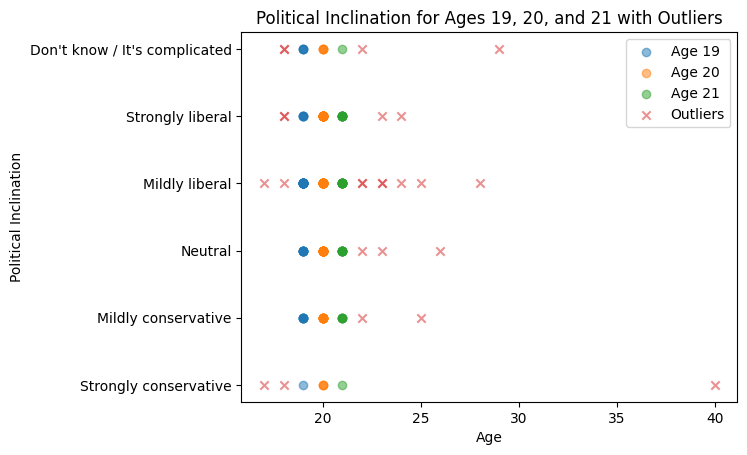

In [142]:
# 2.1 Which age group has the most discrepancies about personal political inclinations?

# Make copies of the data sets
df_max = df[['Age', 'Your Political Inclination']].copy()
df_fardina = df2[['Age', 'Your Political Inclination']].copy()

# Combine both dataframes
df_combined = pd.concat([df_max, df_fardina], keys=['Max', 'Fardina'])

# Drop rows with NaN in 'Your Political Inclination' column
df_combined = df_combined.dropna(subset=['Your Political Inclination'])

# Map numerical values to actual categories
political_inclination_map = {0: 'Strongly conservative', 1: 'Mildly conservative', 2: 'Neutral',
                             3: 'Mildly liberal', 4: 'Strongly liberal', 5: 'Don\'t know / It\'s complicated'}

# Convert 'Your Political Inclination' to numerical values
df_combined['Your Political Inclination'] = pd.Categorical(df_combined['Your Political Inclination'],
                                                          categories=political_inclination_map.values(),
                                                          ordered=True).codes

# Create scatter plots for ages 19, 20, and 21 separately
for age in [19, 20, 21]:
    df_age = df_combined[df_combined['Age'] == age]
    plt.scatter(df_age['Age'], df_age['Your Political Inclination'], alpha=0.5, label=f'Age {age}')

# Create scatter plots for outliers
df_outliers = df_combined[~df_combined['Age'].isin([19, 20, 21])]
plt.scatter(df_outliers['Age'], df_outliers['Your Political Inclination'], alpha=0.5, label='Outliers', marker='x')

# Add labels and title
plt.title('Political Inclination for Ages 19, 20, and 21 with Outliers')
plt.xlabel('Age')
plt.ylabel('Political Inclination')

# Add custom labels to the y-axis
plt.yticks(ticks=range(len(political_inclination_map)), labels=political_inclination_map.values())

# Add legend
plt.legend()

# Display the scatter plot
plt.show()

Question #2

In [143]:
# 2.2 Does Class Year affect Religious Belief Strength?

# Combine the dataframes
combined_df = pd.concat([df, df2], keys=['Max', 'Fardina'])

# Create a cross table of Class Year and Religious Belief Strength
cross_table = pd.crosstab(combined_df['Class Year'], combined_df['Religious Belief Strength'])
cross_table

Religious Belief Strength,Not spiritual at all,Somewhat spiritual,Strongly spiritual
Class Year,,,
Freshman,1,0,0
Junior,55,66,25
Other,2,2,0
Senior,24,9,6
Sophmore,22,13,5


$N_0 = $ Class Year and Religious Belief Strength are independent variables.

$N_A = $ There's a significant association between Class Year and Religious Belief Strength.

In [144]:
chi2, p, dof, expected = sp.stats.chi2_contingency(cross_table)
p

0.1597020764500881

### Results
Assuming $\alpha = 0.01$, since the p value = 0.1597 > $\alpha=0.01$, we fail to reject the null hypothesis. We can not assume Class Year and Religious Belief Strength have a significant associaton. This outcome fails to support the idea that the higher the class year, the less strength in one's religious belief, as college takes you to a dark place.

Question #3

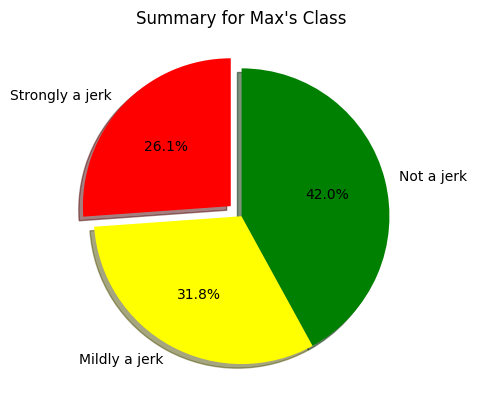

In [145]:
# 2.3 Is there a correlation between the preference for 'Strongly a jerk' responses and being in Max's class?

# Sum up the counts of the three columns separately for Max's Class
df_sum = df[['Sum_Strongly a jerk', 'Sum_Mildly a jerk', 'Sum_Not a jerk']].sum()

# Pie chart for Max's Class
colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)
shadow = True
fig, ax = plt.subplots()

plt.pie(df_sum, labels=['Strongly a jerk', 'Mildly a jerk', 'Not a jerk'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=shadow)
ax.set(title="Summary for Max\'s Class")
plt.show()

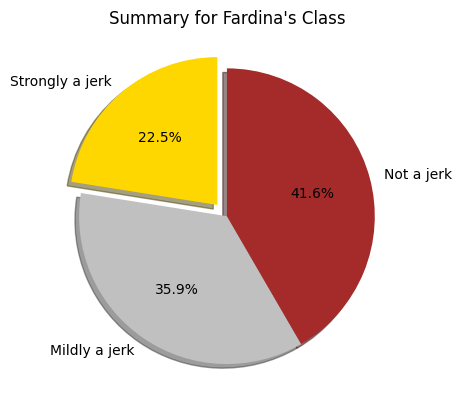

In [146]:
# Sum up the counts of the three columns separately for Fardina's Class
df2_sum = df2[['Sum_Strongly a jerk', 'Sum_Mildly a jerk', 'Sum_Not a jerk']].sum()

# Pie chart for Fardina's Class
colors = ['gold', 'silver', 'brown']
explode = (0.1, 0, 0)
shadow = True
fig, ax = plt.subplots()

plt.pie(df2_sum, labels=['Strongly a jerk', 'Mildly a jerk', 'Not a jerk'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=shadow)
ax.set(title="Summary for Fardina\'s Class")
plt.show()

From the pie chart, you can see that both classes almost equally chose 'Not a jerk' at the same frequency but there is a slight difference between the other two categories and the classes. So lets test the association between selecting 'Strongly a jerk' and being in Max's Class.

$N_0 = $ Selecting 'Strongly a jerk' and being in Max's Class are independent variables.

$N_A = $ There's a significant association between selecting 'Strongly a jerk' and being in Max's Class.

In [147]:
# Create a contingency table for 'df' and 'df2'
contingency_table = pd.crosstab(df['Sum_Strongly a jerk'], df2['Sum_Strongly a jerk'])

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
p_val

0.2745273919042714

### Result
A p-value of 0.2745 indicates that there is no significant evidence to suggest a relationship between selecting 'Strongly a jerk' and being in Max's class compared to Fardina's class. In other words, the p-value is greater than the common alpha level of 0.01, suggesting that any observed differences could be due to random chance rather than a meaningful relationship. Therefore, in this context, the data does not provide sufficient evidence to support the idea that the preference for 'Strongly a jerk' responses is associated with a specific class. From looking at the pie charts there are more people that chose 'Strongly a jerk' in Max's class but it is not significant enough to conclude that there is any association seen through the chi-squared test.